In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [17]:
df = pd.read_csv(r'C:\Users\OS\Desktop\Workspace\FPT\Housing.csv')
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [77]:
df1 = pd.get_dummies(df, columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']) 
df2 = df1.drop(['mainroad_no','guestroom_no','basement_no','hotwaterheating_no','airconditioning_no','prefarea_no'],axis='columns')


In [75]:
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df3 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

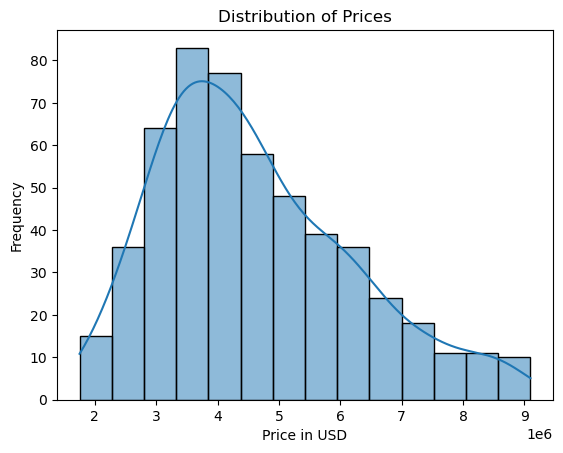

In [78]:
#see the trend of price
sns.histplot(df3['price'],kde = True)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

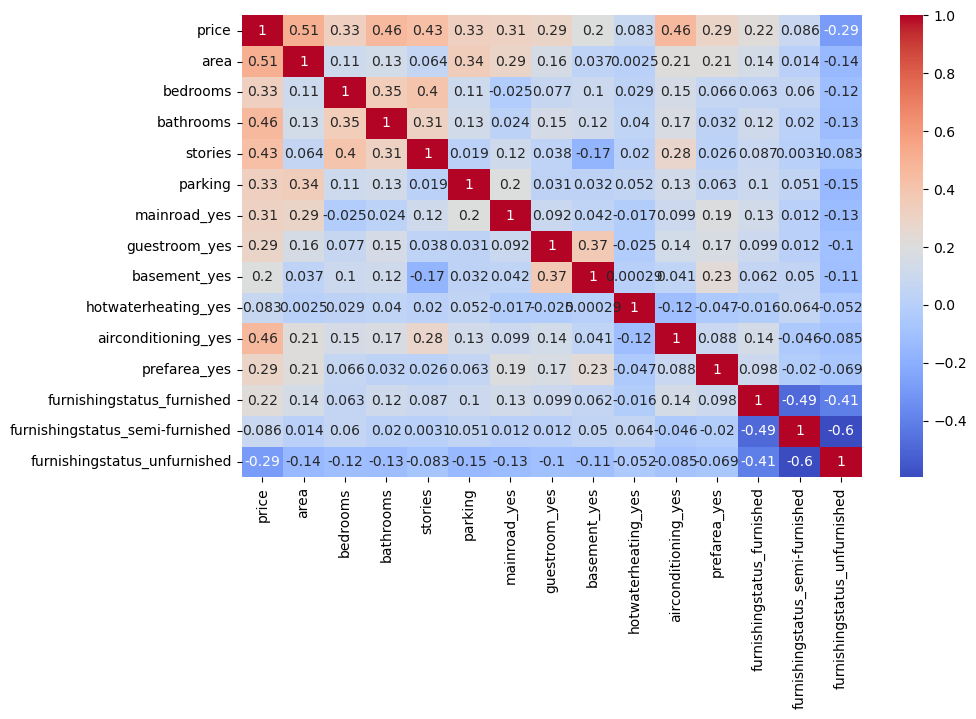

In [79]:
#create a heatmap to see the correlation between values
plt.figure(figsize = (10,6))
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True) 
plt.show()

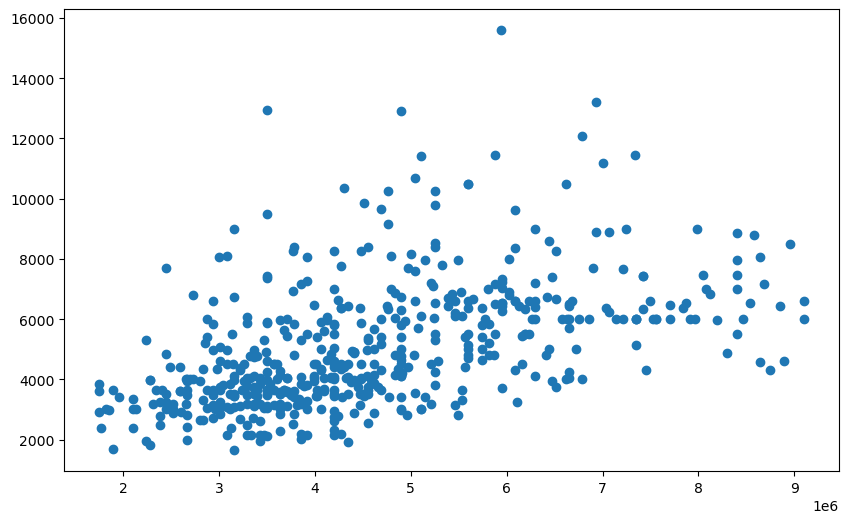

In [81]:
#see the correlation between price and area
plt.figure(figsize = (10,6))
plt.scatter(df3['price'],df3['area'])
plt.show()

In [102]:
X = df3.drop('price', axis=1)
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 1071542.5911739313
R-squared (R²): 0.6684003582833372


In [107]:
new_house = pd.DataFrame([[7420,4,2,3,2,1,0,0,0,1,1,1,0,0]], columns=['area','bedrooms','bathrooms','stories','parking','mainroad_yes', 'guestroom_yes',  'basement_yes', 'hotwaterheating_yes','airconditioning_yes','prefarea_yes',  'furnishingstatus_furnished','furnishingstatus_semi-furnished',  'furnishingstatus_unfurnished' ])
predicted_price = model.predict(new_house)
predicted_price = round(predicted_price[0],2)
print(f"Predicted price: {predicted_price}")


Predicted price: 7468741.33
